In [33]:
import matplotlib.pyplot as plt
import numpy as np
from src.mnist_classifier import MnistClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [34]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784", version=1, parser="pandas")  # Ensure pandas format
X, y = mnist.data, mnist.target.astype(int)

# Convert X to a numpy array to avoid KeyError
X = X.to_numpy()
y = np.array(y)

print("Shape of X:", X.shape)  # Should be (70000, 784)
print("Shape of y:", y.shape)  # Should be (70000,)

Shape of X: (70000, 784)
Shape of y: (70000,)


In [35]:
# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select a subset for visualization (only from test data)
X_sample = X_test[:10]
y_sample = y_test[:10]

In [37]:
# Initialize and train the classifier
clf = MnistClassifier("rf")  # Change to "nn" or "cnn" for other models
clf.train(X_train, y_train)  # Train only on training data

✅ Random Forest model trained successfully!


In [38]:
# Make predictions
predictions = clf.predict(X_test)

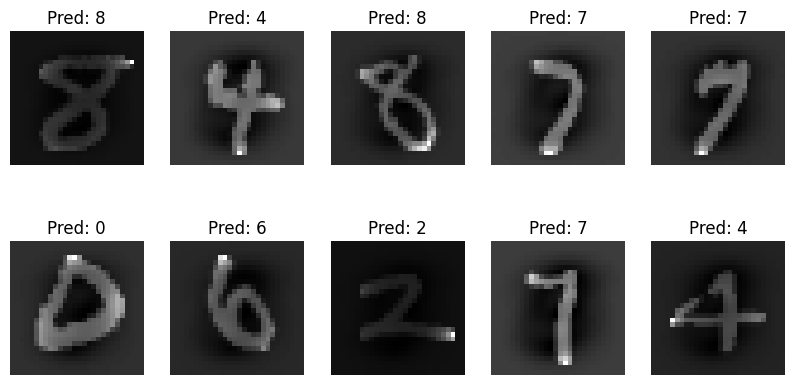

In [39]:
# Display images with predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_sample[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}")
    ax.axis("off")

plt.show()

In [40]:
# Compute accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"✅ Accuracy: {accuracy:.4f}")


✅ Accuracy: 0.9669


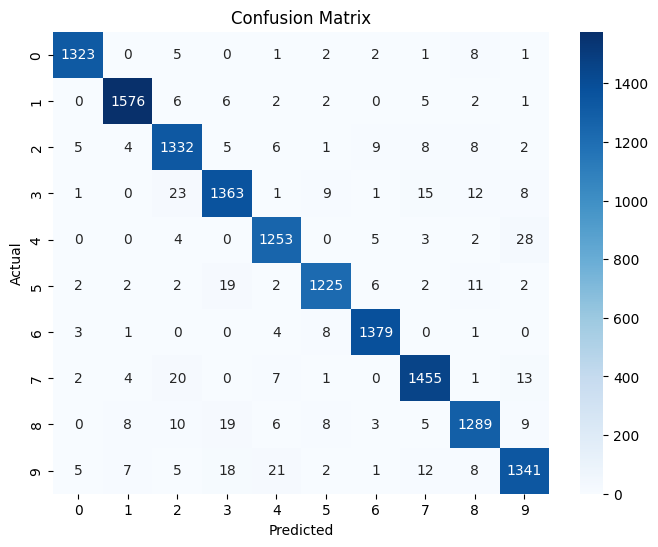

In [41]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

✅ Generate a custom handwritten digit (simulated)

In [42]:
!python3 inference.py --algorithm rf --filename 9.png

📂 Loading image: artifacts/test_images/9.png
🔍 Image max pixel value: 255.0, min: 0.0
💾 Loading trained model from /home/oks/VSCode_Projects/ml-test-vision-nlp/Image_classification/artifacts/models/rf.pkl...
Figure(640x480)
✅ Model Prediction: 8
